数据收集阶段：

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import tweepy
import os
import json

首先，根据现有条件收集数据，包括如下步骤：

1.针对本地数据，直接进行导入。

In [2]:
twi_arc_en = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twi_arc_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2.通过requests库，获取网页数据。

In [4]:
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
r = requests.get(url)

In [5]:
with open (os.path.join(url.split('/')[-1]),mode='wb')as file:
    file.write(r.content)

In [6]:
image_predict=pd.read_csv('image-predictions.tsv',sep='\t')
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
3.通过API接口，从Json文件中截取有用数据。

In [7]:
twi_add_info_list=[]

In [8]:
with open('tweet_json.txt',encoding='utf-8') as file:
    for line in file.readlines():
        dic = json.loads(line)
        twi_add_info_list.append({'id':dic['id'],
                                       'retweet_count':dic['retweet_count'],
                                       'favorite_count':dic['favorite_count']})
twi_add_info = pd.DataFrame(twi_add_info_list,columns=['id','retweet_count','favorite_count'])

In [9]:
twi_add_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


在收集完数据后，进入数据评估阶段

首先，评估数据质量问题

In [10]:
twi_arc_en.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

数据评估质量问题：1. 分子数据存在不符合事实的情况，其中有分子小于10,也有分子大于1000的情况。需要关注。

In [11]:
twi_arc_en.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

数据评估质量问题：2. 分母数据存在不符合事实的情况,分母存在不等于10的情况。

In [12]:
twi_arc_en[~twi_arc_en.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


数据评估质量问题：
3.'in_reply_to_status_id' 数据格式为浮点数，应该为整数

4.'in_reply_to_user_id'数据格式为浮点数，应该为整数

In [13]:
type(twi_arc_en.timestamp[0])

str

数据评估质量问题：
5.'timestamp'的格式并非时间格式，需要修改

6.'retweeted_status_id' 数据格式为浮点数，应该为整数

7.'retweeted_status_user_id'数据格式为浮点数，应该为整数

8.'retweeted_status_timestamp'的格式并未时间格式，需要修改

In [14]:
twi_arc_en.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Daisy             7
Toby              7
an                7
Bailey            7
Buddy             7
Oscar             6
Stanley           6
Koda              6
Bella             6
Dave              6
Milo              6
Leo               6
Rusty             6
Scout             6
Jack              6
Jax               6
very              5
               ... 
Rontu             1
Dotsy             1
Pluto             1
Pip               1
Ed                1
Bodie             1
Dewey             1
JD                1
Fabio             1
Jo                1
Burt              1
Hazel             1
Sobe              1
Grey              1
Maya              1
Acro              1
Pete              1
Ron               1
Jay               1


数据评估质量问题：
9. 'Name'列中存在若干狗的名字为a的情况，需要关注。同时，存在没有名字的情况。

In [15]:
twi_arc_en.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
twi_arc_en.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
twi_arc_en.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
twi_arc_en.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

数据评估质量问题：
10. 狗的地位若干列中存在较多空值，需要关注。

数据整洁度问题：

1.twi_add_info可以同twi_arc_en合并


2.根据变量应为一列的原则，在twi_arc_en中可以将狗的stage合并为一列。

根据上述分析，数据在质量和整洁度问题上存在如下问题：
质量问题：
1.分子数据存在不符合事实的情况，其中有分子小于10,也有分子大于1000的情况。需要关注。

2.分母数据存在不符合事实的情况,分母存在不等于10的情况。

3.'in_reply_to_status_id' 数据格式为浮点数，应该为整数

4.'in_reply_to_user_id'数据格式为浮点数，应该为整数

5.'timestamp'的格式并非时间格式，需要修改

6.'retweeted_status_id' 数据格式为浮点数，应该为整数

7.'retweeted_status_user_id'数据格式为浮点数，应该为整数

8.'retweeted_status_timestamp'的格式并未时间格式，需要修改

9.'Name'列中存在若干狗的名字为a的情况，需要关注。同时，存在没有名字的情况。

10.狗的地位若干列中存在较多空值，需要关注。

整洁度问题：
1.twi_add_info可以同twi_arc_en合并

2.根据变量应为一列的原则，在twi_arc_en中可以将狗的stage合并为一列。

数据清理阶段

质量问题：
1. 分子数据存在不符合事实的情况，其中有分子小于10,也有分子大于1000的情况。需要关注。

清理代码：

In [19]:
numerator=twi_arc_en['text'].str.extract(r'(\d+\.?\d*/)')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [20]:
twi_arc_en['rating_numerator']=numerator.str.strip('/')

In [21]:
twi_arc_en['rating_numerator'][387] = twi_arc_en['rating_numerator'][387][-1]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
twi_arc_en['rating_numerator'].astype(str)

0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      13
20      12
21      13
22      14
23      13
24      13
25      12
26      13
27      13
28      13
29      12
        ..
2326     2
2327     7
2328     9
2329    11
2330     6
2331     8
2332    10
2333     9
2334     3
2335     1
2336    11
2337    10
2338     1
2339    11
2340     8
2341     9
2342     6
2343    10
2344     9
2345    10
2346     8
2347     9
2348    10
2349     2
2350    10
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: object

测试代码：

In [23]:
twi_arc_en['rating_numerator'].value_counts()

12       558
11       464
10       461
13       351
9        158
8        102
7         55
14        54
5         35
6         32
3         19
4         17
1          9
2          9
0          2
15         2
420        2
9.75       2
99         1
20         1
50         1
44         1
45         1
80         1
24         1
204        1
13.5       1
143        1
84         1
60         1
17         1
11.27      1
88         1
1776       1
165        1
9.5        1
182        1
666        1
121        1
960        1
144        1
11.26      1
Name: rating_numerator, dtype: int64

质量问题：
2. 分母数据存在不符合事实的情况,分母存在不等于10的情况。

In [24]:
twi_arc_en['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
twi_arc_en['text'].str.extract(r'(/\d+)').value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


/10     2333
/50        3
/11        3
/20        2
/80        2
/16        1
/70        1
/170       1
/40        1
/150       1
/2         1
/110       1
/7         1
/120       1
/15        1
/90        1
/130       1
/00        1
Name: text, dtype: int64

重新使用正则表达式抓取数据，未发现重大不一致的情况。但是分母是0的数据比较奇怪，故进行深入了解。

In [26]:
twi_arc_en['text'][twi_arc_en['rating_denominator']==0]

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [27]:
twi_arc_en['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [28]:
twi_arc_en['rating_denominator'][313]=10
twi_arc_en['rating_numerator'][313]=13.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


测试代码

In [29]:
twi_arc_en['rating_numerator'][313]

13.0

In [30]:
twi_arc_en['rating_denominator'][313]

10

质量问题：
3.'in_reply_to_status_id' 数据格式为浮点数，应该为整数

In [31]:
status_id_amend_format = twi_arc_en['in_reply_to_status_id'][pd.notnull(twi_arc_en['in_reply_to_status_id'])].astype(int).astype(str)

In [32]:
twi_arc_en['in_reply_to_status_id'][list(status_id_amend_format.index)]=status_id_amend_format

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


测试代码：

In [33]:
twi_arc_en['in_reply_to_status_id'][list(status_id_amend_format.index)]

30      886266357075128320
55      881607037314052096
64      879553827334172672
113     870726202742493184
148     863425645568774144
149     667152164079423488
179     857156678055342080
184     855818117272018944
186     856286004109553664
188     855861584463351808
189     855858535607001088
218     850328818778820608
228     848212111729840128
234     847606175596138496
251     759099523532779520
274     840698300298862592
290     838145498691194880
291     838085539362402304
313     835245984028504064
342     832087547559997440
346     831903044224835584
387     826598365270007808
409     823326389336244224
427     821152592717697024
498     813127251579564032
513     811627233043480576
565     733109485275860992
570     801854330672447488
576     800857954417262592
611     797123751162839040
               ...        
1479    693572215938367488
1497    692417313023332352
1501    692041934689402880
1523    690341253549002752
1598    686034024800862208
1605    685547936038666240
1

质量问题：4. 'in_reply_to_user_id'数据格式为浮点数，应该为整数

In [34]:
user_id_amend_format=twi_arc_en['in_reply_to_user_id'][pd.notnull(twi_arc_en['in_reply_to_user_id'])].astype(int).astype(str)

In [35]:
twi_arc_en['in_reply_to_user_id'][list(user_id_amend_format.index)]=user_id_amend_format

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


测试代码：

In [36]:
twi_arc_en['in_reply_to_user_id'][list(user_id_amend_format.index)]

30              2281181600
55                47384430
64              3105440746
113               16487760
148               77596200
149             4196983835
179              180670967
184             4196983835
186              279280991
188              194351775
189               13615722
218               21955058
228             4196983835
234             4196983835
251             4196983835
274     840547864354918400
290               21955058
291             2894131180
313               26259576
342               30582082
346               20683724
387             4196983835
409             1582853809
427              113211856
498             4196983835
513             4196983835
565             4196983835
570               11856342
576              291859009
611               29166305
               ...        
1479            1198988510
1497            4196983835
1501            4196983835
1523             467036706
1598            4196983835
1605            4196983835
1

质量问题：5.'timestamp'的格式并非时间格式，需要修改

In [37]:
twi_arc_en['timestamp'] = pd.to_datetime(twi_arc_en['timestamp'])

测试代码：

In [38]:
twi_arc_en['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

质量问题：6.'retweeted_status_id' 数据格式为浮点数，应该为整数

In [39]:
retweeted_status_format = twi_arc_en['retweeted_status_id'][pd.notnull(twi_arc_en['retweeted_status_id'])].astype(int).astype(str)

In [40]:
twi_arc_en['retweeted_status_id'][list(retweeted_status_format.index)]=retweeted_status_format

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


测试代码：

In [41]:
twi_arc_en['retweeted_status_id'][list(retweeted_status_format.index)]

19      887473957103951872
32      886053734421102592
36      830583320585068544
68      878057613040115712
73      878281511006478336
74      669000397445533696
78      876850772322988032
91      866334964761202688
95      868880397819494400
97      873213775632977920
101     872657584259551232
109     841077006473256960
118     859196978902773760
124     868552278524837888
130     865013420445368320
132     866450705531457536
137     837820167694528512
146     863062471531167744
155     806629075125202944
159     860563773140209664
160     860914485250469888
165     761672994376806400
171     839549326359670784
180     857061112319234048
182     844704788403113984
185     856330158768218112
194     842163532590374912
195     855122533267460096
204     831650051525054464
211     829374341691346944
               ...        
784     740373189193256960
794     771380798096281600
800     765222098633691136
811     673320132811366400
815     771002130450743296
818     739238157791694848
8

质量问题：7.'retweeted_status_user_id'数据格式为浮点数，应该为整数

In [42]:
retweeted_status_user_format = twi_arc_en['retweeted_status_user_id'][pd.notnull(twi_arc_en['retweeted_status_user_id'])].astype(int).astype(str)

In [43]:
twi_arc_en['retweeted_status_user_id'][list(retweeted_status_user_format.index)]=retweeted_status_user_format

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


测试代码：

In [44]:
twi_arc_en['retweeted_status_user_id'][list(retweeted_status_user_format.index)]

19              4196983835
32                19607400
36              4196983835
68              4196983835
73              4196983835
74              4196983835
78               512804507
91              4196983835
95              4196983835
97              4196983835
101              154767397
109             4196983835
118             4196983835
124             4196983835
130     787461778435289088
132             4196983835
137             4196983835
146             4196983835
155             4196983835
159             4196983835
160              363890752
165             4196983835
171             4196983835
180               58709723
182             4196983835
185               66699013
194             4196983835
195     747554344434831360
204             4196983835
211             4196983835
               ...        
784             4196983835
794             4196983835
800             4196983835
811             4196983835
815             1732729088
818             4196983835
8

质量问题：8.'retweeted_status_timestamp'的格式并未时间格式，需要修改

In [45]:
twi_arc_en['retweeted_status_timestamp'] = pd.to_datetime(twi_arc_en['retweeted_status_timestamp'])

测试代码：

In [46]:
twi_arc_en['retweeted_status_timestamp']

0                      NaT
1                      NaT
2                      NaT
3                      NaT
4                      NaT
5                      NaT
6                      NaT
7                      NaT
8                      NaT
9                      NaT
10                     NaT
11                     NaT
12                     NaT
13                     NaT
14                     NaT
15                     NaT
16                     NaT
17                     NaT
18                     NaT
19     2017-07-19 00:47:34
20                     NaT
21                     NaT
22                     NaT
23                     NaT
24                     NaT
25                     NaT
26                     NaT
27                     NaT
28                     NaT
29                     NaT
               ...        
2326                   NaT
2327                   NaT
2328                   NaT
2329                   NaT
2330                   NaT
2331                   NaT
2

质量问题：9. 'Name'列中存在若干狗的名字为a的情况，需要关注。同时，存在没有名字的情况。

In [47]:
twi_arc_en['text'][twi_arc_en['name']=='a']

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

由于a或者an只是代表了量词，且在文本中没有出现名字。故修改成None。

In [48]:
twi_arc_en['name'][list(twi_arc_en['text'][twi_arc_en['name']=='a'].index)] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
twi_arc_en['name'][list(twi_arc_en['text'][twi_arc_en['name']=='an'].index)] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


测试代码：

In [50]:
twi_arc_en['name'].value_counts()

None         807
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
Bailey         7
Buddy          7
Toby           7
Milo           6
Koda           6
Leo            6
Dave           6
Jack           6
Oscar          6
Jax            6
Rusty          6
Bella          6
Stanley        6
Scout          6
Phil           5
Gus            5
very           5
            ... 
Hazel          1
Sobe           1
Grey           1
Maya           1
Acro           1
Lucia          1
Einstein       1
Iroh           1
Nugget         1
Noosh          1
Billy          1
Gerbald        1
Loomis         1
Bobbay         1
Sundance       1
Jeb            1
Mark           1
DonDon         1
Bonaparte      1
Shawwn         1
Lacy           1
Petrick        1
Crumpet        1
Randall        1
Crawford       1
Ruffles        1
Reagan         1
Bert          

质量问题：10. 狗的地位若干列中存在较多空值，需要关注。

In [51]:
twi_arc_en['text'][twi_arc_en['doggo']=='None'].sample(5)

604     RT @dog_rates: This is Timison. He just told a...
2186    Unique dog here. Oddly shaped tail. Long pink ...
1043    RT @dog_rates: Extremely intelligent dog here....
1616    This is Alfie. That is his time machine. He's ...
187     This is Cermet, Paesh, and Morple. They are ab...
Name: text, dtype: object

In [52]:
twi_arc_en['text'][twi_arc_en['doggo']=='None'][1093]

"Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC"

In [53]:
twi_arc_en['text'][twi_arc_en['doggo']=='None'][1612]

'This is Rocky. He sleeps like a psychopath. 10/10 quality tongue slip https://t.co/MbgG95mUdu'

In [54]:
twi_arc_en['text'][twi_arc_en['doggo']=='None'][904]

"This is Corey. He's a Portobello Corgicool. Trying to convince you that he's not a hipster. 11/10 yea right Corey https://t.co/NzWUrFZydr"

In [55]:
twi_arc_en['text'][twi_arc_en['doggo']=='None'][399]

'RT @dog_rates: This is Bailey. She loves going down slides but is very bad at it. Still 11/10 https://t.co/ivPWhspN3E'

In [56]:
twi_arc_en['text'][twi_arc_en['doggo']=='None'][524]

"This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionately https://t.co/wHu15q2Q6p"

随机抽取了doggy列为None的Text列，Text的内容中的确不包含狗狗的Stage的描述。

整洁度问题：twi_add_info可以同twi_arc_en合并

In [57]:
twi_arc_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [58]:
twi_add_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [59]:
twi_add_info.rename(columns={'id':'tweet_id'}, inplace = True)

In [60]:
twi_arc_en = pd.merge(twi_arc_en,twi_add_info,how='left',on='tweet_id')

测试代码：

In [61]:
twi_arc_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count      

整洁度测试2：根据变量应为一列的原则，在twi_arc_en中可以将狗的stage合并为一列。

In [62]:
stage = pd.melt(twi_arc_en[['tweet_id','doggo','floofer','pupper','puppo']],id_vars=['tweet_id'],value_vars=['doggo','floofer','pupper','puppo'],var_name='stage type',value_name='stage')

In [63]:
stage = stage[['tweet_id','stage']]

In [64]:
stage = stage[stage['stage']!='None']

In [65]:
twi_arc_en

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8842.0,39492.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6480.0,33786.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4301.0,25445.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8925.0,42863.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9721.0,41016.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,3240.0,20548.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2142.0,12053.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,19548.0,66596.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4403.0,28187.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,7684.0,32467.0


In [66]:
twi_arc_en=pd.merge(twi_arc_en,stage,how='left',on='tweet_id').drop_duplicates('tweet_id')

In [67]:
twi_arc_en['stage']=twi_arc_en['stage'].fillna('None')

In [68]:
twi_arc_en = twi_arc_en.drop(['doggo','floofer','pupper','puppo'],axis=1)

测试代码：

In [69]:
twi_arc_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2369
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 2352 non-null float64
favorite_count                2352 non-null float64
stage                         2356 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(10)
memory u

存储清理后的数据

In [70]:
twi_arc_en.to_csv('twitter_archive_master.csv',index=False)

可视化分析数据

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
twi_arc_en['rating'] = twi_arc_en['rating_numerator'].astype(float)/twi_arc_en['rating_denominator']

In [73]:
twi_arc_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2369
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 2352 non-null float64
favorite_count                2352 non-null float64
stage                         2356 non-null object
rating                        2356 non-null float64
dtypes: datetime

In [74]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [75]:
rating_array=np.array(twi_arc_en['rating'][(twi_arc_en['rating']<5)&(twi_arc_en['rating']>0)])
retweet_count = np.array(twi_arc_en['retweet_count'][(twi_arc_en['rating']<5)&(twi_arc_en['rating']>0)])
favorite_count = np.array(twi_arc_en['favorite_count'][(twi_arc_en['rating']<5)&(twi_arc_en['rating']>0)])

Text(0.5,1,'Rating & Retweet Count Distribution')

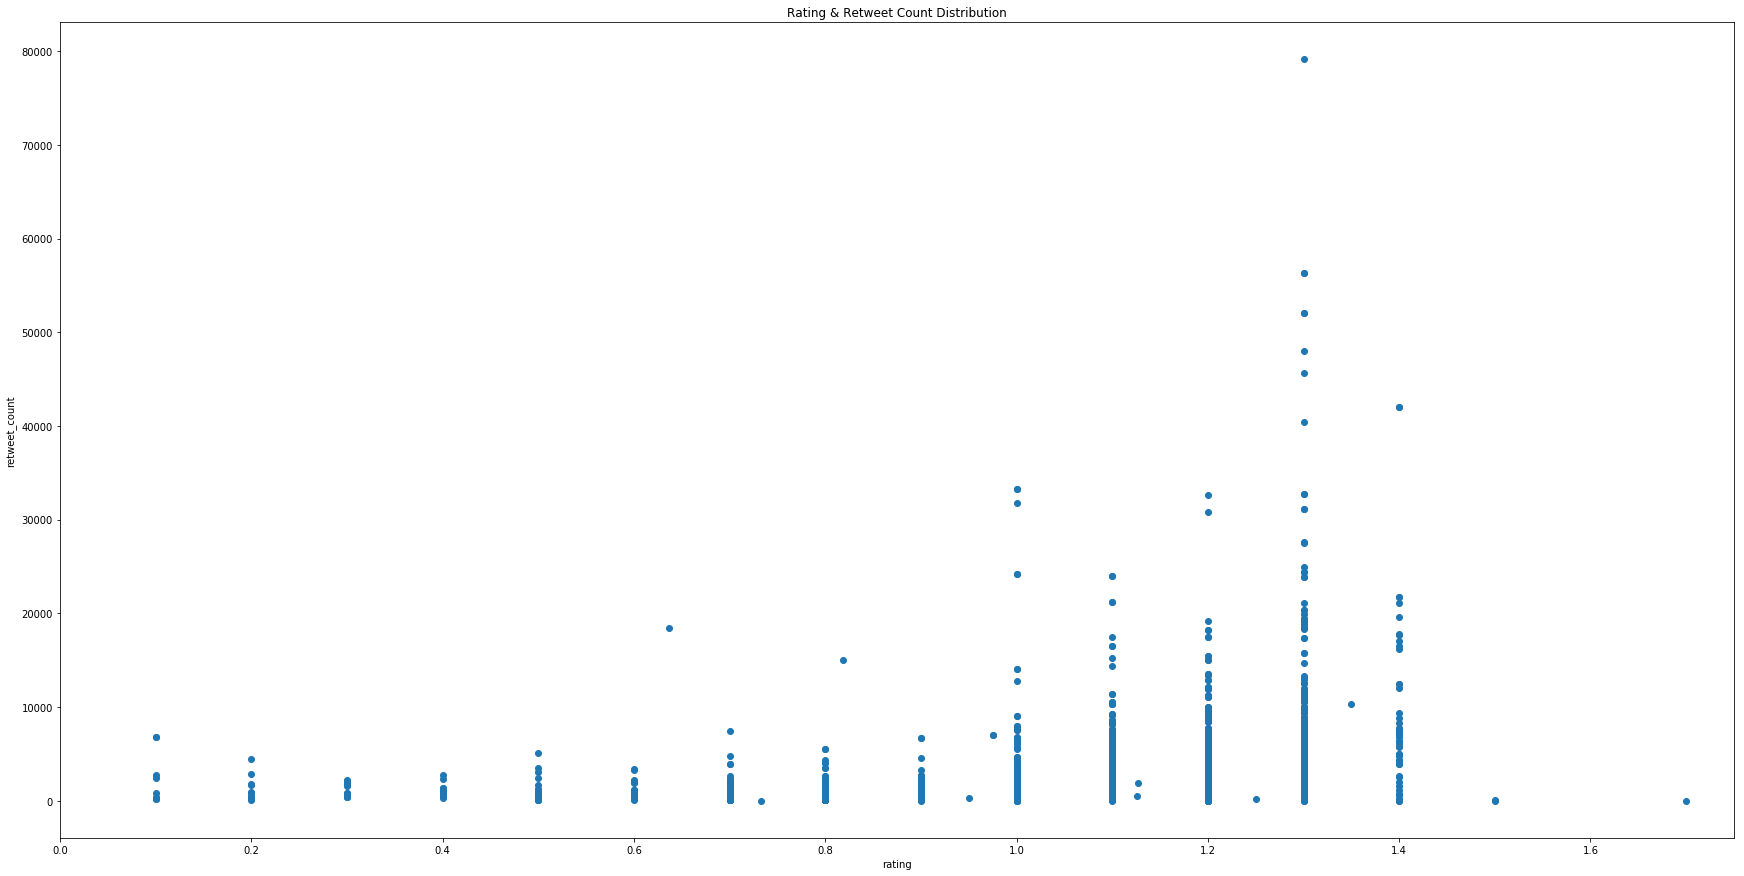

In [76]:
plt.figure(figsize=(30,15))
plt.scatter(rating_array,retweet_count,marker='o')
plt.grid=(True)
plt.xlim(0,1.75)
plt.xlabel('rating')
plt.ylabel('retweet_count')
plt.title('Rating & Retweet Count Distribution')

根据上图，可以看出狗狗的评分数与Tweeter 转发数量成一定的正比关系。

Text(0.5,1,'Rating & favorite Count Distribution')

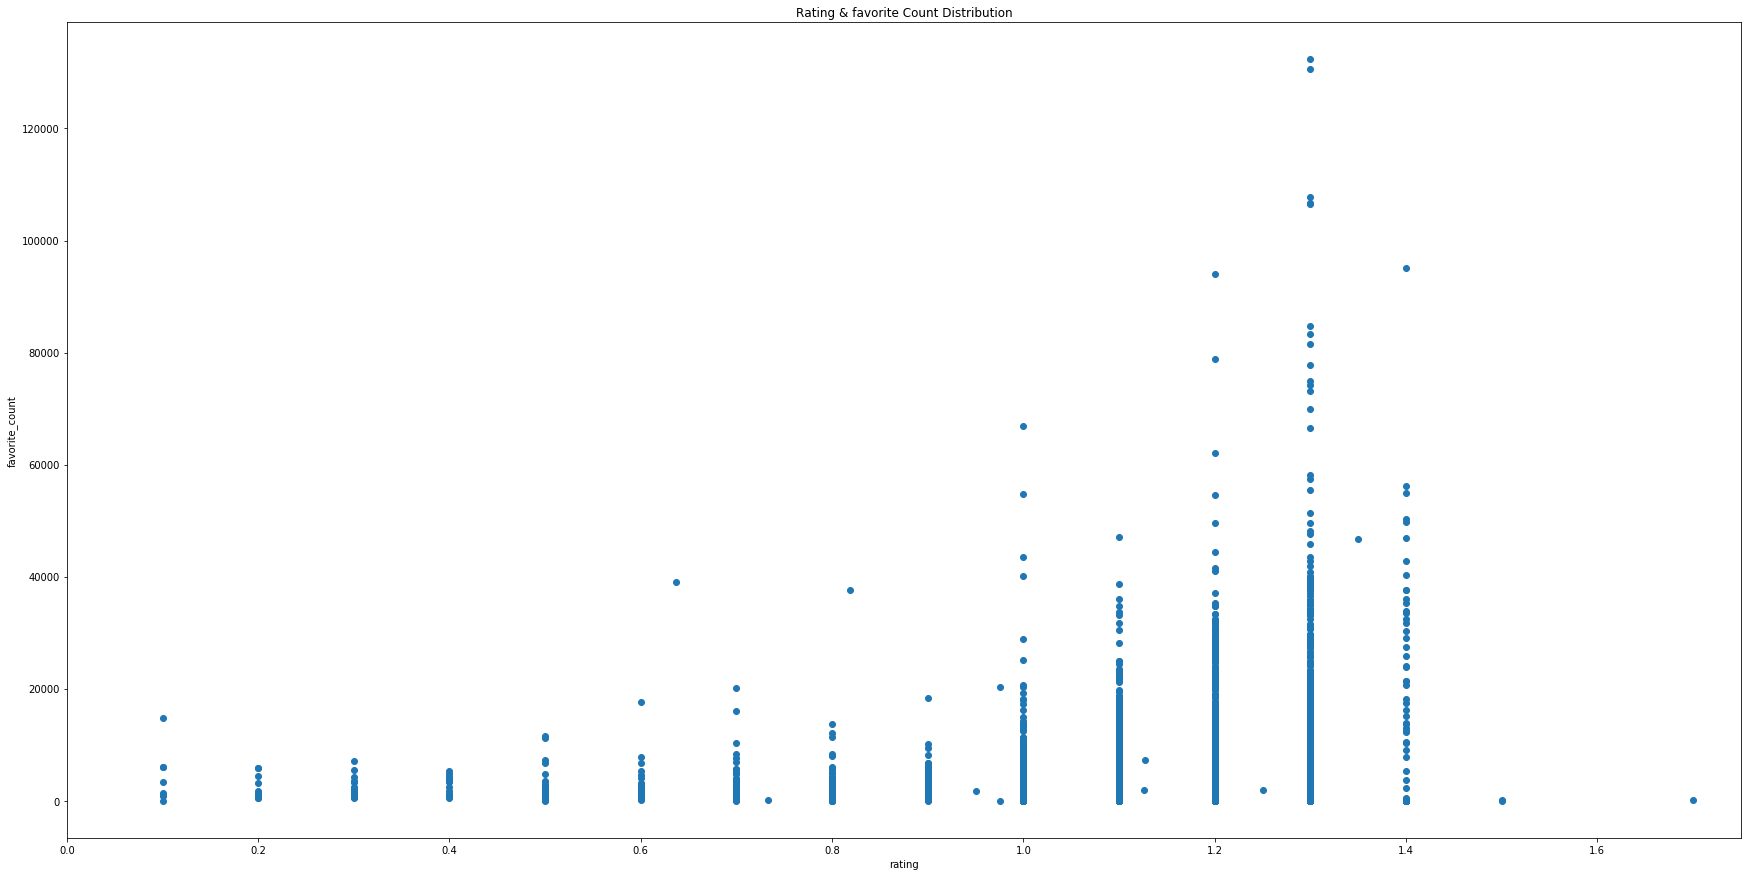

In [77]:
plt.figure(figsize=(30,15))
plt.scatter(rating_array,favorite_count,marker='o')
plt.grid=(True)
plt.xlim(0,1.75)
plt.xlabel('rating')
plt.ylabel('favorite_count')
plt.title('Rating & favorite Count Distribution')

根据上图，可以看出狗狗的评分数与Tweeter 喜欢数量成一定的正比关系。

Text(0.5,1,'Retweet & favorite Count Distribution')

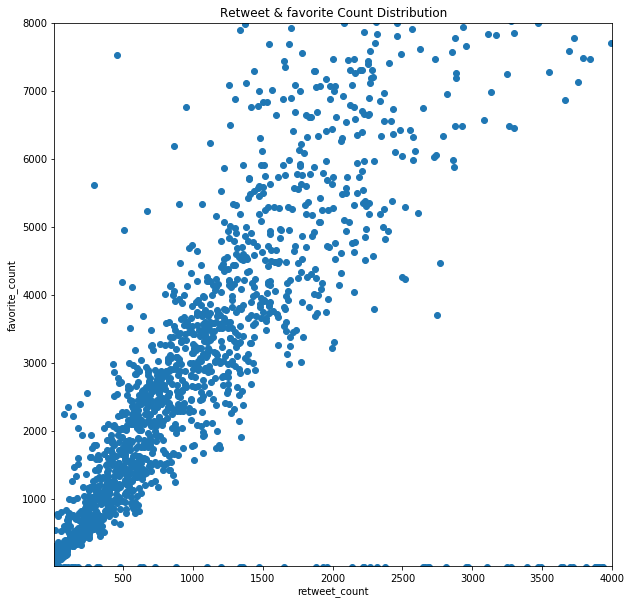

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(retweet_count,favorite_count,marker='o')
plt.grid=(True)
plt.xlim(10,4000)
plt.ylim(10,8000)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Retweet & favorite Count Distribution')

根据上图，可以看出Tweeter转发数量与Tweeter 喜欢数量成一定的比例关系，转发数量与喜欢数量比例约为1：2。

Text(0.5,1,'Forecast Probability')

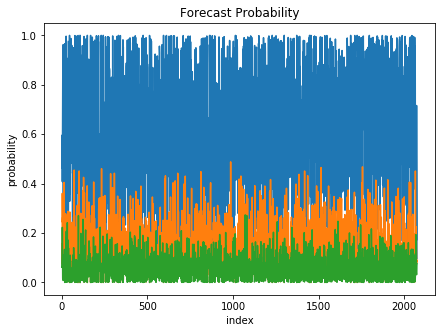

In [93]:
plt.figure(figsize=(7,5))
plt.plot(image_predict[['p1_conf','p2_conf','p3_conf']])
plt.grid=(True)
plt.xlabel('index')
plt.ylabel('probability')
plt.title('Forecast Probability')

根据上图，可以看出第一种预测为正确的概率较高，第二种预测和第三种预测为正确的概率大致相等。